In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Tensorflow 실습 해보기 

### _Objective_
1.  빗 방울이 떨어졌을 때 파동을 계산한 공식을 구현합니다.
+ 해당 그래프는 학습 그래프와 평가 그래프로 나뉘어집니다. 

## Rain Drop 구현하기

학습 그래프를 텐서 플로우로 구현합니다. <br>
![Imgur](https://i.imgur.com/2aRBErg.png)

평가 그래프를  구현합니다. <br>
![Imgur](https://i.imgur.com/3h6bLfT.png)

In [ ]:
# 우선 아래 코드를 실행해 주세요 
# Laplace은 아래 코드를 사용하세요
def laplace(x):
    def make_kernel(a):
        """Transform a 2D array into a convolution kernel"""
        a = np.asarray(a)
        a = a.reshape(list(a.shape) + [1, 1])
        return tf.constant(a, dtype=1)

    def simple_conv(x, k):
        """A simplified 2D convolution operation"""
        x = tf.expand_dims(tf.expand_dims(x, 0), -1)
        y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
        return y[0, :, :, 0]
    """Compute the 2D laplacian of an array"""

    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                             [1.0, -6., 1.0],
                             [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)


# 임의의 좌표에 임의의 값 40개를 생성 합니다. 
N = 500
u_init = np.zeros([500,500] , dtype=np.float32)
ut_init = np.zeros([500,500] , dtype=np.float32)

for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a,b] = np.random.uniform()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* U와 Ut의 값을 갱신하는 연산은 `update_op` 변수에 담아주세요.
* 평가그래프의 출력 텐서는 `output` 변수에 담아주세요.

In [27]:
graph = tf.Graph()
with graph.as_default():
    eps = tf.placeholder(tf.float32, shape=())
    damping = tf.placeholder(tf.float32, shape=())

    # Create variables for simulation state
    U = tf.Variable(u_init, name='U')
    Ut = tf.Variable(ut_init, name='Ut')
    
    ### 정답을 아래에 작성해 주세요

#### 정답 확인
* 정답이 아래와 같이 나타나면 됩니다.
* step 을 1000 번 수행하고  output을 시각화 하면 아래와 같은 그림이 나오면 성공 입니다.<br>
![Imgur](https://i.imgur.com/6G7vxxh.png)


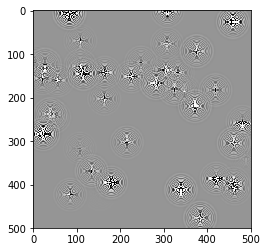

In [28]:
with graph.as_default():
    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())

    for i in range(1000):
        sess.run(update_op, {eps: 0.03, damping: 0.04})

    result = sess.run(output)
plt.imshow(result, cmap='Greys')
plt.show()

#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>